**Context:**

---


This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content:**

---


It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

# **I. Analytic Libraries**

---

Python has been built with extraordinary Python libraries for data science that are used by programmers every day in solving problems

**Importing the Python libraries**

To begin with Import all the neccessary libraries and modules

In [1]:
# Analysis Tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

# Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Text processing tools
import re
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **II. Dataset Processing**

---



Data processing is the collection and manipulation of items of data to produce meaningful information

**A. Mounting Drive**

Dataset is read from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**B. Loading the Dataset**

Read the csv file into a dataframe from the drive by mentioning the encoding inorder to resolve the UnicodeDecode error

In [3]:
data=pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', encoding='ISO-8859–1')

**B. Exploratory Data Analysis**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data for better understanding of data

In [4]:
# Displaying first five rows of the dataset
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Observation:  Columns are without any proper names. Need to rename columns for reference.

In [5]:
# Column names
data.columns=['TweetPolarity', 'TweetID', 'TweetDate', 'Flag', 'UserName', 'Text']
# Displayibg first 5 rows of the dataset
data.head()

,TweetPolarity,TweetID,TweetDate,Flag,UserName,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Observation: Columns have been renamed with provided names

In [6]:
# Displaying last five rows of the dataset
data.tail()

,TweetPolarity,TweetID,TweetDate,Flag,UserName,Text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
# Rows and columns
data.shape

(1599999, 6)

Observation: There are 6 features with 16,00,000 entries in the dataset

In [8]:
# Datatypes
data.dtypes

TweetPolarity     int64
TweetID           int64
TweetDate        object
Flag             object
UserName         object
Text             object
dtype: object

Observation: 2 features are of integer datatypes and rest of the features are object datatype

In [9]:
# More information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   TweetPolarity  1599999 non-null  int64 
 1   TweetID        1599999 non-null  int64 
 2   TweetDate      1599999 non-null  object
 3   Flag           1599999 non-null  object
 4   UserName       1599999 non-null  object
 5   Text           1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Observation: Tweet dates are given as string datatype

In [10]:
# Null value count
data.isnull().sum()

TweetPolarity    0
TweetID          0
TweetDate        0
Flag             0
UserName         0
Text             0
dtype: int64

Observation: There are no null value present

In [11]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

TweetPolarity : 2 

TweetID : 1598314 

TweetDate : 774362 

Flag : 1 

UserName : 659775 

Text : 1581465 



Observation:

1.   TweetPolarity has 2 categories
2.   Flag has one category
3.   Users are not unique

In [12]:
# Value counts for each feature
for i in data.columns:
  print("----------------")
  print((data[i].value_counts()).to_frame(),'\n')
 

----------------
   TweetPolarity
4         800000
0         799999 

----------------
            TweetID
1753678185        2
1678693526        2
1835870889        2
2190104868        2
1984377787        2
...             ...
2056931811        1
2212131300        1
2188589814        1
1983537638        1
1964587131        1

[1598314 rows x 1 columns] 

----------------
                              TweetDate
Mon Jun 15 12:53:14 PDT 2009         20
Mon Jun 15 13:39:50 PDT 2009         17
Fri May 29 13:40:04 PDT 2009         17
Fri May 22 05:10:17 PDT 2009         17
Fri Jun 05 14:13:07 PDT 2009         16
...                                 ...
Sat Jun 20 17:45:10 PDT 2009          1
Tue Apr 07 03:46:04 PDT 2009          1
Wed Jun 17 03:30:08 PDT 2009          1
Mon Jun 22 16:27:42 PDT 2009          1
Mon Jun 01 18:25:55 PDT 2009          1

[774362 rows x 1 columns] 

----------------
             Flag
NO_QUERY  1599999 

----------------
                 UserName
lost_dog           

Observation:

1.   TweetPolarity has 2 categories, 0: Positive & 4: Negative
2.   Flag has only category with no queries 



# **III. Data Preprocessing**

---



Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient form

**Tweet polarity**

In [13]:
# Decoding data into categories as positive and negative based on polairty of tweets 0: Negative and 4: Positive as directed by the datset desciption.
data['TweetPolarity']=np.where(data['TweetPolarity']==0, "Negative", data['TweetPolarity'])
data['TweetPolarity']=np.where(data['TweetPolarity']=='4', "Positive", data['TweetPolarity'])

In [14]:
# Value counts of polaity of tweets after decoding
data['TweetPolarity'].value_counts()

Positive    800000
Negative    799999
Name: TweetPolarity, dtype: int64

#**IV. Text Processing**

---



Text processing is the automated process of analyzing and sorting unstructured text data to gain valuable insights. For grammatical reasons, documents are going to use different forms of a word, such as write, writing and writes. Additionally, there are families of derivationally related words with similar meanings. NLTK is a python library which got functions to perform text processing task for NLP.Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods.

*   Stemming: 
Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

*  Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

*  Stopwords
stopwords are commonly used words in English which have no contextual meaning in an sentence.

In [15]:
# converting rows having data other than string datatype into string.
for i in range(0,len(data)-1):
    if type(data.iloc[i]['Text']) != str:
        data.iloc[i]['Text'] = str(data.iloc[i]['Text'])

**Word cloud**

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [ ]:
# Defining function for plotting wordcloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

**Stopwords**

In [ ]:
# Stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Word cloud for stopwords
plot_wordcloud(stop_words, title="Word Cloud of stopwords")
plt.show()

Observation: Stopwords need to be removed from the tweets text before classification

**Text**

In [ ]:
# Word cloud for text
plot_wordcloud(data['Text'], title="Word Cloud of text")
plt.show()

In [ ]:
# Function for text cleaning
def clean_data(text, stem=False):
  text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
  tokens = []
  stemmer = nltk.SnowballStemmer("english")
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
# Cleaning text
data.Text = data.Text.apply(lambda x: clean_data(x))

In [ ]:
data['Text']

# **V. Data Analysis**

---



The purpose of Data Analysis is to extract actionable insights, uncover useful information, identify the patterns and derive conclusions from the data.

**Data Visualization**

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

**1. Null value count**

In [ ]:
# Plotting null value count
null_values = (data.isnull().sum()).sort_values(ascending=False)
null_values.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

Observation: There are no null values

**2. Pie plot of 'TweetPolarity'**

In [ ]:
# Pie plot
size = [data['TweetPolarity'].value_counts(normalize=True)[0], data['TweetPolarity'].value_counts(normalize=True)[1]]
colors = ['red', 'navy']
labels = 'Positive', 'Negative'
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effects', fontsize = 20)
plt.legend()
plt.show()

Observation: Polarity of the tweets are balanced.

**3. Word cloud**

In [ ]:
# Word cloud for text after text processing
plot_wordcloud(data['Text'], title="Word Cloud of text")
plt.show()

In [ ]:
# Word cloud for positive tweets
positive_tweets = data[data['TweetPolarity']=='Positive']
plot_wordcloud(positive_tweets['Text'], title="Word Cloud of positive tweets")
plt.show()

In [ ]:
# Word cloud for negative tweets
negative_tweets = data[data['TweetPolarity']=='Negative']
plot_wordcloud(negative_tweets['Text'], title="Word Cloud of negative tweets")
plt.show()

**Label encoding**

Label encoding is a process by which categorical variables are converted into new (binary) numbers, indicating the presence of each possible value from the original data.

In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['TweetPolarity']=encoder.fit_transform(data['TweetPolarity'])

#**VI. Model Development and Performance Evaluation**

**A. Dataset Splitting**

Splitting the dataset into train set and test set in the ratio of 75:25 respectively

In [ ]:
# Columns
data.columns

Observation: Need to drop the columns other than Text and TweetPolarity to train and classify the sentiments

In [54]:
# Choosing features for model building
X = data.drop(['TweetID', 'TweetDate', 'Flag', 'UserName','TweetPolarity'], axis=1)
# Target variable is polaity of the tweets
y=pd.DataFrame(data['TweetPolarity'])

In [ ]:
# Datatypes
data.dtypes

Observation: Datatypes of Text and TweetPolarity are as required for the model building

In [55]:
# Splitting the dataset in the ratio of 80:20 respectively as train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
# Shape of training set
X_train.shape, y_train.shape

((1279999, 1), (1279999, 1))

In [57]:
# Shape of testing set
X_test.shape, y_test.shape

((320000, 1), (320000, 1))

**B. Deep learning models**

Fitting the training set into deep learing models to predict the polarity of tweets

**Tokenization**

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

In [58]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290442


Since this notebook is to build a sequence model, sequence of numbers should be fed into it. There should be no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. Pad_sequence can be used to make all the sequences in one constant length MAX_SEQUENCE_LENGTH.

In [59]:
# Maximum nuber of words and maximum sequence length
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [60]:
# Converting all the sequences in one constant length
from keras.preprocessing.sequence import pad_sequences

Xtrain = pad_sequences(tokenizer.texts_to_sequences(X_train.Text),
                        maxlen = MAX_SEQUENCE_LENGTH)
Xtest = pad_sequences(tokenizer.texts_to_sequences(X_test.Text),
                       maxlen = MAX_SEQUENCE_LENGTH)

**Word embedding**

Word Embedding is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

Going in the path of Computer Vision, Transfer Learning is used here. After downloading the pre-trained embedding it can be used in building model.

The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification.

In [41]:
# Downloading the zip file
!wget http://nlp.stanford.edu/data/glove.6B.zip
# Unzipping the downloaded file
!unzip glove.6B.zip

--2021-08-27 12:21:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-08-27 12:21:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-08-27 12:21:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [42]:
# Get the exact path of where the embedding vectors are extracted using
!ls
!pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [61]:
# Defining parameters for word embedding
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10

In [62]:
# Indexing the vectors
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [63]:
# Embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [64]:
# Embedding layer
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

As shown in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem while using a Machine Learning model like Naive Bayes, SVD, etc.. Hence Sequence Models can be used


Model architecture

1) Embedding Layer - Generates Embedding Vector for each input sequence.

2) Conv1D Layer - Its using to convolve data into smaller feature vectors.

3) LSTM - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) Dense - Fully Connected Layers for classification

In [65]:
# Importing modules from tensorflow
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [66]:
# Model building
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

**Optimization Algorithm**


Adam optimization algorithm is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments

In [67]:
# Model compiling
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])

**Callbacks**

Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. 

LRScheduler - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

ModelCheckPoint - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [ ]:
# call backs
from tensorflow.keras.callbacks import ReduceLROnPlateau
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [68]:
# Fitting the model
history = model.fit(Xtrain, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(Xtest, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 530s 419ms/step - loss: 0.5193 - accuracy: 0.7391 - val_loss: 0.4859 - val_accuracy: 0.7651
Epoch 2/10
1250/1250 [==============================] - 516s 413ms/step - loss: 0.4876 - accuracy: 0.7622 - val_loss: 0.4727 - val_accuracy: 0.7733
Epoch 3/10
1250/1250 [==============================] - 533s 426ms/step - loss: 0.4768 - accuracy: 0.7692 - val_loss: 0.4666 - val_accuracy: 0.7760
Epoch 4/10
1250/1250 [==============================] - 514s 411ms/step - loss: 0.4708 - accuracy: 0.7732 - val_loss: 0.4659 - val_accuracy: 0.7753
Epoch 5/10
1250/1250 [==============================] - 528s 422ms/step - loss: 0.4661 - accuracy: 0.7762 - val_loss: 0.4630 - val_accuracy: 0.7793
Epoch 6/10
1250/1250 [==============================] - 520s 416ms/step - loss: 0.4629 - accuracy: 0.7783 - val_loss: 0.4625 - val_accuracy: 0.7800
Epoch 7/10
1250/1250 [==============================] - 520s 416ms/step - loss: 0.4602 - accuracy: 0.7795 - val_

**C. Model Evaluation**

Evaluating the performance of models using Learning Curve of loss, confusion matrix and classification report

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

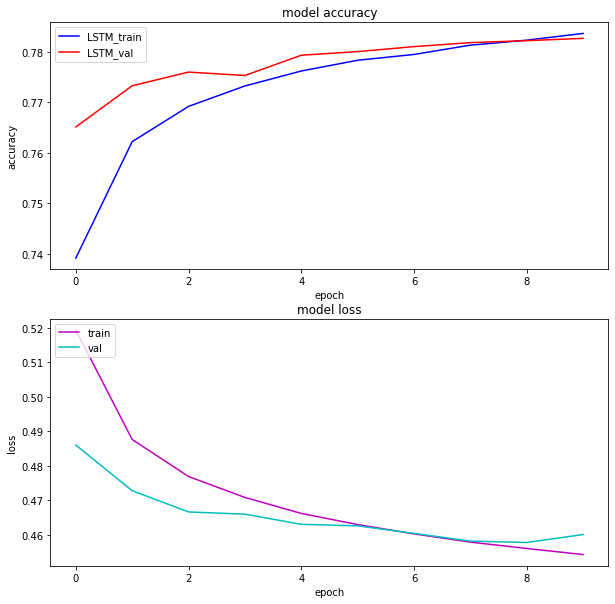

In [69]:
# Learning Curve of loss and accuracy of the model on each epoch.
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model outputs a prediction score between 0 and 1 which could be classified into  two classes by defining a threshold value for it.

Threshold value=0.5
0.5 < sentiment, POSITIVE sentiment
0.5 > sentiment, NEGATIVE sentiment

In [115]:
# Mapping sentiments as positive ang negative
def decode_sentiment(score):
    return 1 if score>0.5 else 0

scores = model.predict(Xtest, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 4s 128ms/step


In [116]:
# Classification report of metrics for evaluating the model
print(classification_report(list(y_test.TweetPolarity), y_pred_1d))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [85]:
# Function to plot confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

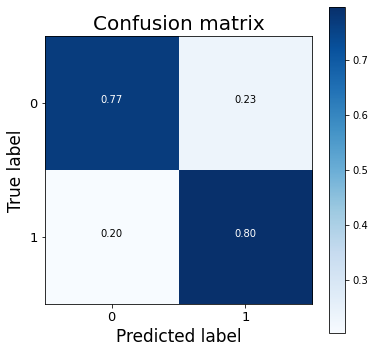

In [117]:
# Plotting confusion matrix
cnf_matrix = confusion_matrix(y_test.TweetPolarity.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=y_test.TweetPolarity.unique(), title="Confusion matrix")
plt.show()

# **VII. Conclusion**

---



Sequence model has achieved a desirable accuracy of 80% considering the baseline human accuracy is low in NLP tasks.